In [2]:
import numpy as np
import pandas as pd

C:\Users\Isabe\AppData\Local\Temp\ipykernel_19784\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#importiamo il file
dataset=pd.read_csv(".\Amazon_Customer_Behavior_Survey.csv")

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Isabe\AppData\Local\Temp\ipykernel_19784\1194477022.py:2: SyntaxWarning: invalid escape sequence '\A'
  dataset=pd.read_csv(".\Amazon_Customer_Behavior_Survey.csv")


In [4]:
#osserviamo il numero di righe e colonne del dataset
print(dataset.shape)
print("n° di righe:", dataset.shape[0])
print("n° di colonne:", dataset.shape[1])


(602, 23)
n° di righe: 602
n° di colonne: 23


In [6]:
#metadati e sommario con descrittori statistici
print("colonne:",dataset.columns,"\n")

colonne: Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object') 



In [7]:
#trovo quanti valori unici ci sono nella colonna Purchase_Frequency
lista_frequenza_acquisti=len(dataset.iloc[:,3].unique())
print(lista_frequenza_acquisti)

5


In [7]:
#sommario con descrittori statistici 
riepilogo = dataset.describe() 
print(riepilogo)

              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [8]:
import matplotlib.pyplot as plt

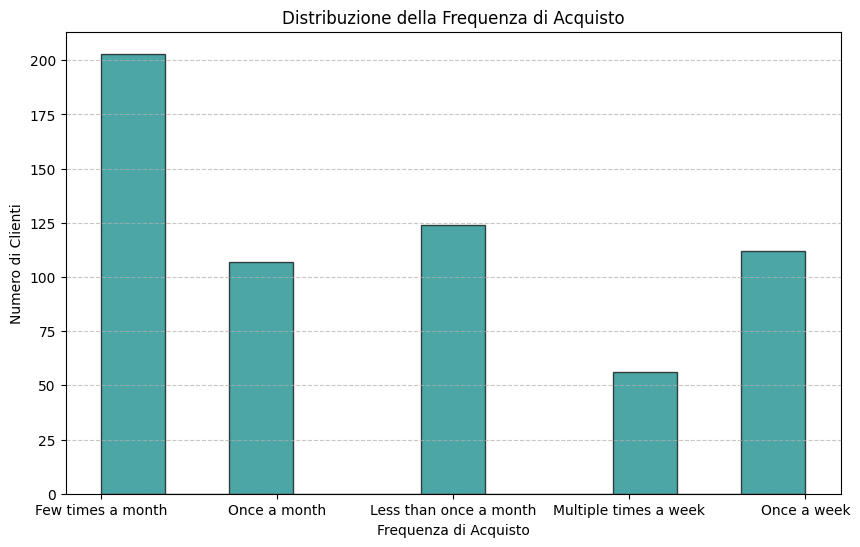

In [9]:
#Visualizza la distribuzione della frequenza di acquisto per capire quanto spesso i clienti effettuano acquisti, 
#per analisi della frequenza di acquisto

plt.figure(figsize=(10, 6))
plt.hist(dataset['Purchase_Frequency'], bins='auto', color='#008080', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Acquisto')
plt.xlabel('Frequenza di Acquisto')
plt.ylabel('Numero di Clienti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
#guardiamo le prime righe della colonna Purchase_Categories e ci accorgiamo che in questa colonna ci sono liste, 
#quindi deduciamo che qualche utenete ha effettutato acquisti in più categorie diverse

print(dataset.iloc[:,4].head(15))

0                              Beauty and Personal Care
1                                  Clothing and Fashion
2       Groceries and Gourmet Food;Clothing and Fashion
3     Beauty and Personal Care;Clothing and Fashion;...
4         Beauty and Personal Care;Clothing and Fashion
5                                  Clothing and Fashion
6                                  Clothing and Fashion
7         Beauty and Personal Care;Clothing and Fashion
8         Beauty and Personal Care;Clothing and Fashion
9         Beauty and Personal Care;Clothing and Fashion
10                                 Clothing and Fashion
11    Beauty and Personal Care;Clothing and Fashion;...
12        Beauty and Personal Care;Clothing and Fashion
13                Clothing and Fashion;Home and Kitchen
14                             Beauty and Personal Care
Name: Purchase_Categories, dtype: object


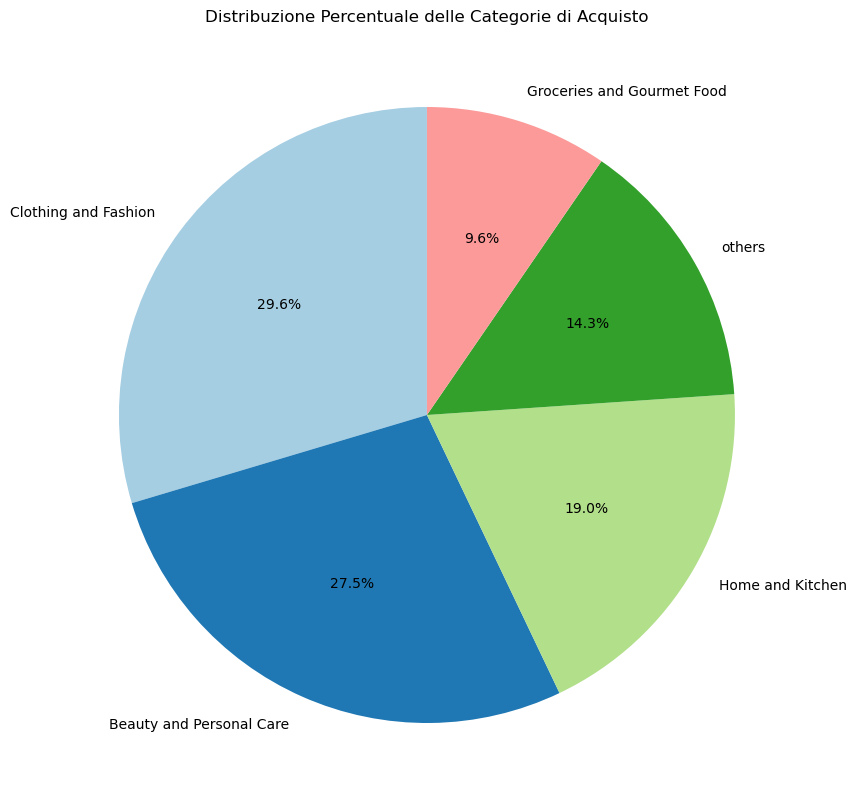

In [11]:
#Visualizza la distribuzione della frequenza di acquisto per capire quanto spesso i clienti effettuano acquisti, 
#per analisi della frequenza di acquisto

dataset = pd.read_csv('/Users/michelavenier/Desktop/EPICODE/6_SETTIMANA/ESERCITAZIONE_G.COMICO_29.01.2024/Amazon Customer Behavior Survey.csv')
# Trasformazione delle categorie di acquisto multiple
dataset['Purchase_Categories'] = dataset['Purchase_Categories'].str.split(';')
dataset_expanded = dataset.explode('Purchase_Categories')
# Conteggio delle frequenze delle categorie di acquisto
categorie_popolari = dataset_expanded['Purchase_Categories'].value_counts()
# Visualizzazione del grafico a torta delle categorie di acquisto più popolari
plt.figure(figsize=(10, 10))
plt.pie(categorie_popolari, labels=categorie_popolari.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuzione Percentuale delle Categorie di Acquisto')
plt.show()


Index(['Yes', 'No'], dtype='object', name='Review_Left')


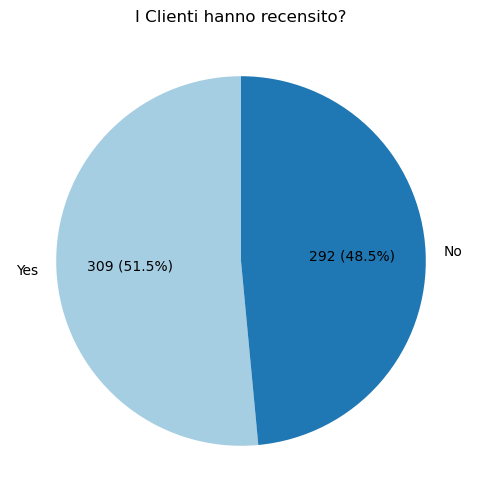

In [12]:
# Esplorazione delle recensioni:  Esamina la frequenza con cui i clienti lasciano recensioni

# Conteggio delle frequenze delle recensioni
frequenza_recensioni = dataset['Review_Left'].value_counts()
label=frequenza_recensioni.index
print(label)

# Visualizzazione dell'istogramma delle frequenze delle recensioni
plt.figure(figsize=(8, 6))
plt.pie(frequenza_recensioni, labels=frequenza_recensioni.index, autopct=lambda p: f'{int(p/100*sum(frequenza_recensioni))} ({p:.1f}%)', startangle=90, colors=plt.cm.Paired.colors)
plt.title('I Clienti hanno recensito?')
plt.show()


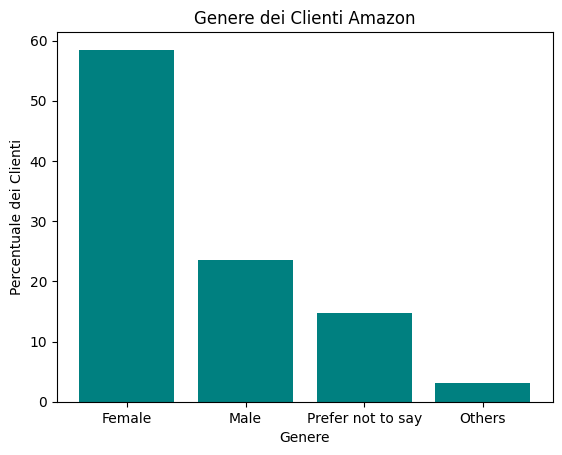

In [11]:
#Visualizza la distribuzione di acquisto per gender

gender_counts = dataset['Gender'].value_counts()
gender_percentage=gender_counts*100/sum(gender_counts)

plt.bar(gender_percentage.index, gender_percentage.values,color='#008080')
plt.title('Genere dei Clienti Amazon')
plt.xlabel('Genere')
plt.ylabel('Percentuale dei Clienti')
plt.show()


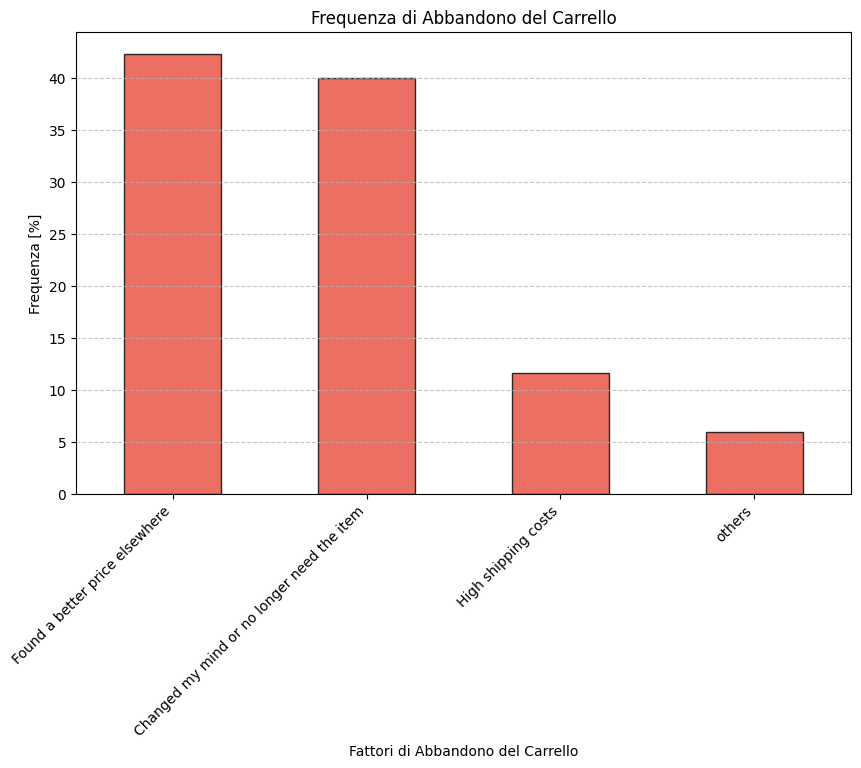

In [12]:
# Conteggio delle frequenze di abbandono del carrello
count_abbandono_carrello = dataset['Cart_Abandonment_Factors'].value_counts()
frequenza_abbandono_carrello=count_abbandono_carrello*100/sum(count_abbandono_carrello)

# Visualizzazione dell'istogramma
plt.figure(figsize=(10, 6))
frequenza_abbandono_carrello.plot(kind='bar', color='#e74c3c', edgecolor='black', alpha=0.8)
plt.title('Frequenza di Abbandono del Carrello')
plt.xlabel('Fattori di Abbandono del Carrello')
plt.ylabel('Frequenza [%]')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

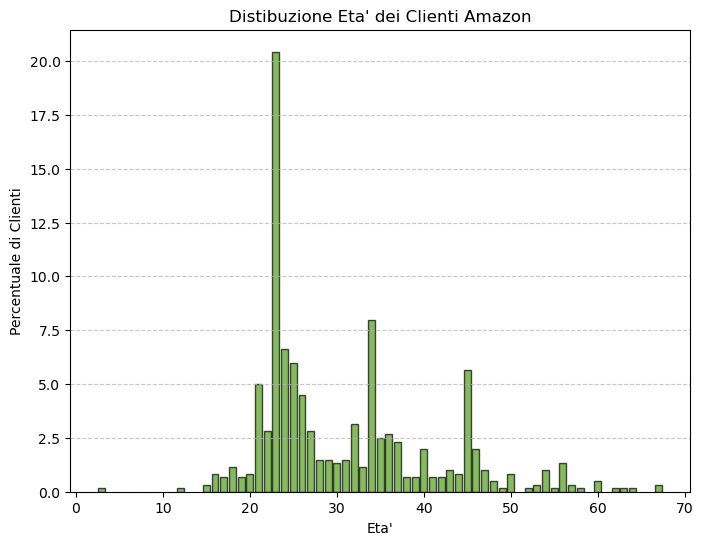

In [15]:
#Visualizza la distribuzione di età dei clienti amazon

eta_counts = dataset['age'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(eta_counts.index, eta_counts*100/sum(eta_counts),color='#4F9E19',edgecolor='black', alpha=0.7)
plt.title("Distibuzione Eta' dei Clienti Amazon")
plt.xlabel("Eta'")
plt.ylabel('Percentuale di Clienti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


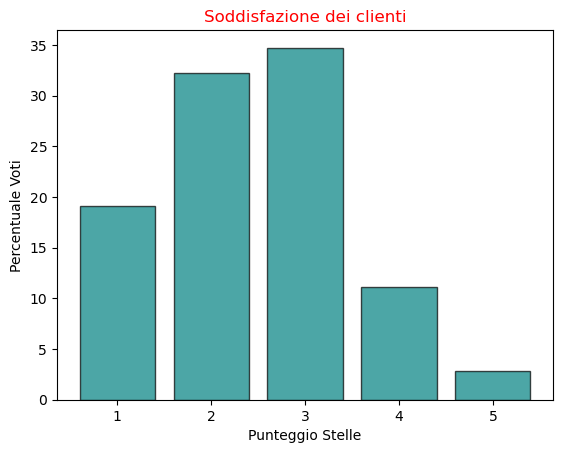

In [16]:
#Visualizza l'andamento delle recensioni relative agli acquisti
recensioni_tot=dataset['Shopping_Satisfaction'].shape

conteggio_recensioni = dataset['Shopping_Satisfaction'].value_counts().sort_index()
plt.bar(conteggio_recensioni.index, conteggio_recensioni.values*100/recensioni_tot[0], color='#008080', edgecolor='black', alpha=0.7)
plt.title('Soddisfazione dei clienti', color='r')
plt.ylabel('Percentuale Voti')
plt.xlabel('Punteggio Stelle')
plt.show()

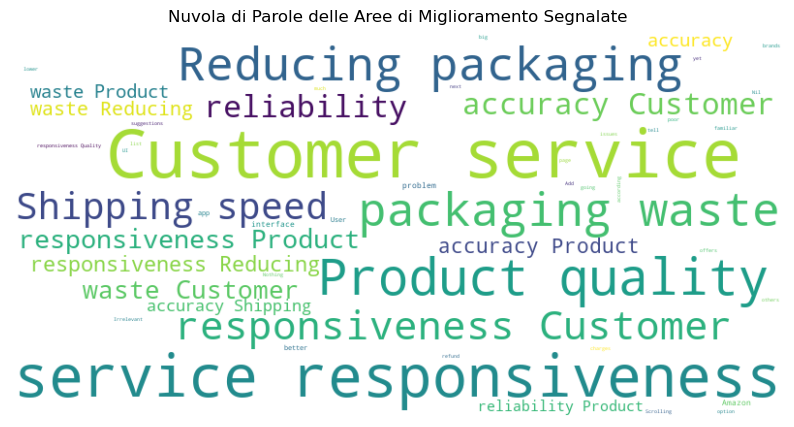

In [17]:
#Esplora le risposte dei clienti per identificare le aree di miglioramento segnalate

import wordcloud
from wordcloud import WordCloud
# Seleziona le colonne contenenti le risposte dei clienti
risposte_clienti = dataset['Improvement_Areas'].dropna()
# Unisce tutte le risposte in un'unica stringa
testo_completo = ' '.join(risposte_clienti)
# Crea una nuvola di parole
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(testo_completo)
# Visualizzazione della nuvola di parole
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvola di Parole delle Aree di Miglioramento Segnalate')
plt.show()

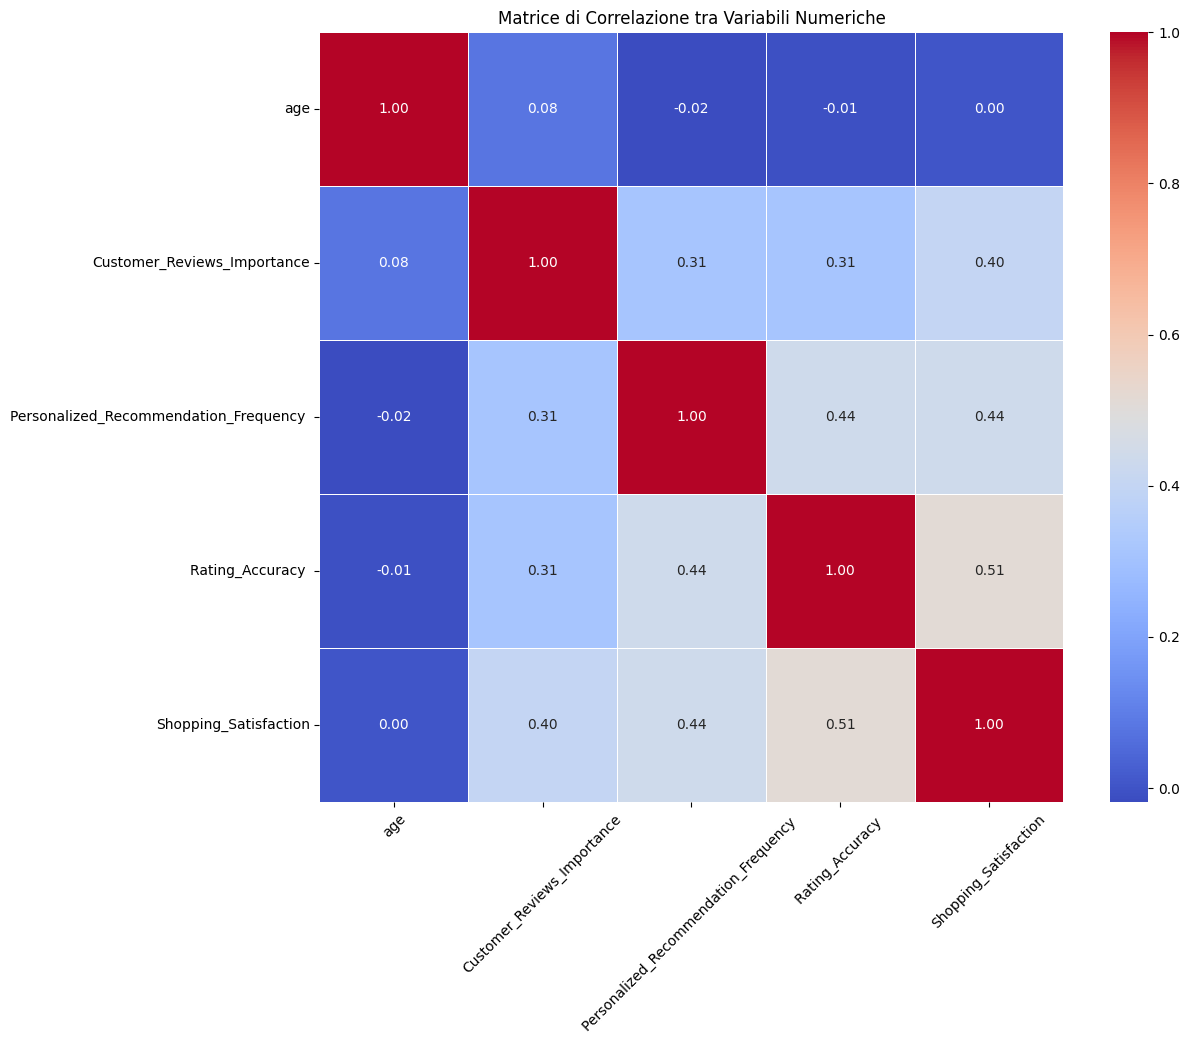

In [13]:
# Utilizza una matrice di correlazione o scatter plot per esaminare le relazioni tra le diverse variabili nel dataset

import seaborn as sns
# Seleziona solo le colonne numeriche dal dataset
colonne_numeriche = dataset.select_dtypes(include='number').columns

# Calcola la matrice di correlazione solo per le colonne numeriche
corr_matrix = dataset[colonne_numeriche].corr()
# Crea un heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra Variabili Numeriche')
plt.xticks(rotation=45)
plt.show()

Customer_Reviews_Importance
3    216
1    169
2    115
4     64
5     38
Name: count, dtype: int64 Customer_Reviews_Importance
3    35.880399
1    28.073090
2    19.102990
4    10.631229
5     6.312292
Name: count, dtype: float64


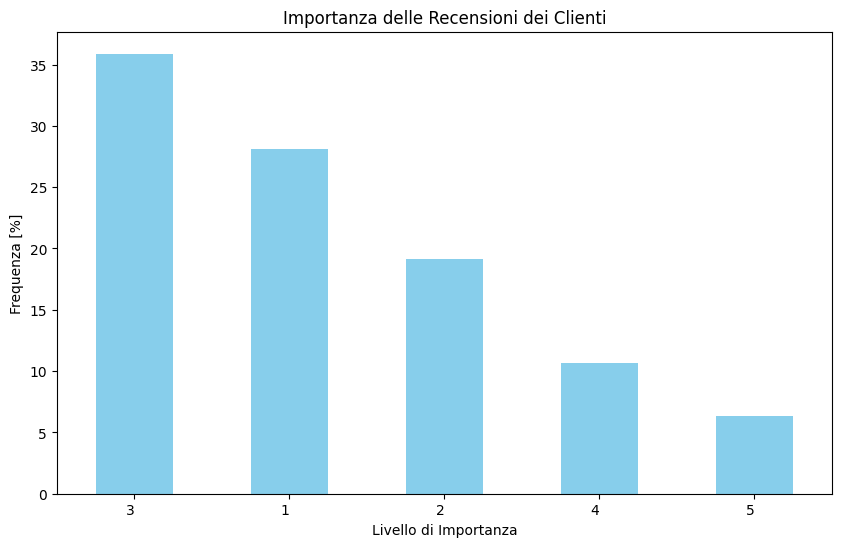

In [14]:
# Importanza delle Recensioni dei Clienti nel decidere di fare i propri acquisti

# Esamina la distribuzione di Customer_Reviews_Importance
importance_counts = dataset['Customer_Reviews_Importance'].value_counts()
importance_percentage=importance_counts*100/sum(importance_counts)
print(importance_counts,importance_percentage)

# Visualizza un grafico a barre
plt.figure(figsize=(10, 6))
importance_percentage.plot(kind='bar', color='skyblue')
plt.title('Importanza delle Recensioni dei Clienti')
plt.xlabel('Livello di Importanza')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Frequenza [%]')
plt.show()


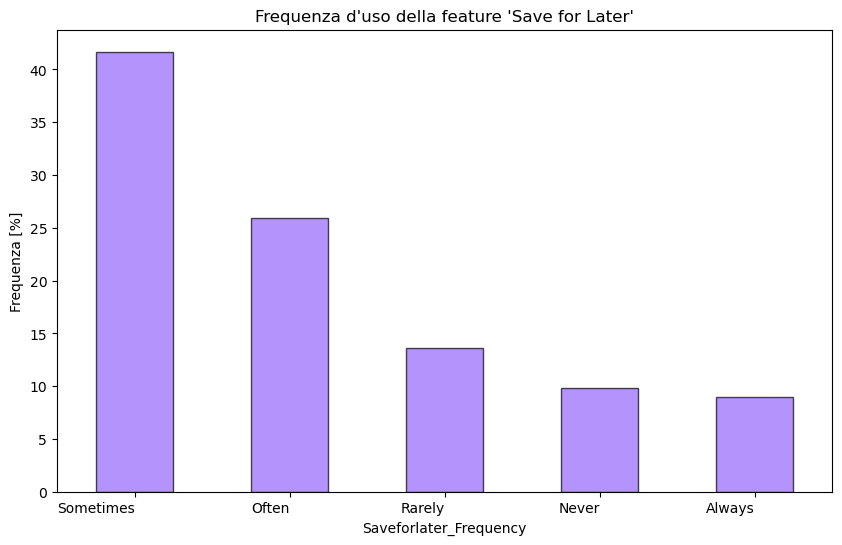

In [20]:
# frequenza d'uso della feature "Save for Later"
saveforlater_counts = dataset['Saveforlater_Frequency'].value_counts()
saveforlater_percentage=saveforlater_counts*100/sum(saveforlater_counts)

# Visualizza un grafico a barre
plt.figure(figsize=(10, 6))
saveforlater_percentage.plot(kind='bar', color='#9565FB', edgecolor='black', alpha=0.7)
plt.title("Frequenza d'uso della feature 'Save for Later'", color='k')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Frequenza [%]')
plt.show()

Product_Search_Method
categories    223
Keyword       214
Filter        127
others         36
Name: count, dtype: int64 Product_Search_Method
categories    37.166667
Keyword       35.666667
Filter        21.166667
others         6.000000
Name: count, dtype: float64


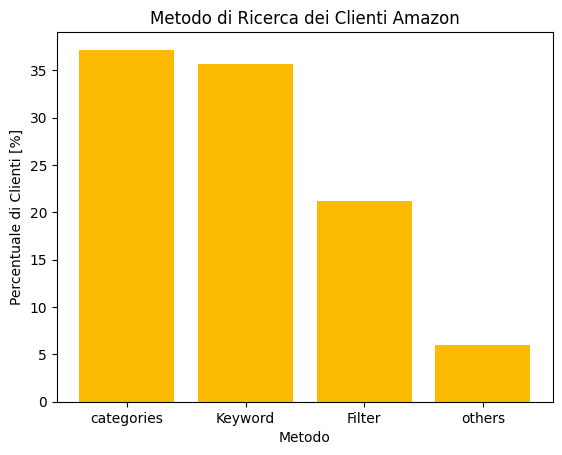

In [15]:
#Visualizza la distribuzione di acquisto per metodo di ricerca

# Esamina la distribuzione di Customer_Reviews_Importance
Product_Search_Method_counts = dataset['Product_Search_Method'].value_counts()
Product_Search_Method_percentage=Product_Search_Method_counts*100/sum(Product_Search_Method_counts)
print(Product_Search_Method_counts,Product_Search_Method_percentage)

plt.bar(Product_Search_Method_percentage.index, Product_Search_Method_percentage.values,color='#fcba03')
plt.title('Metodo di Ricerca dei Clienti Amazon')
plt.xlabel('Metodo')
plt.ylabel('Percentuale di Clienti [%]')
plt.show()


c:\Users\Isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1000x600 with 0 Axes>

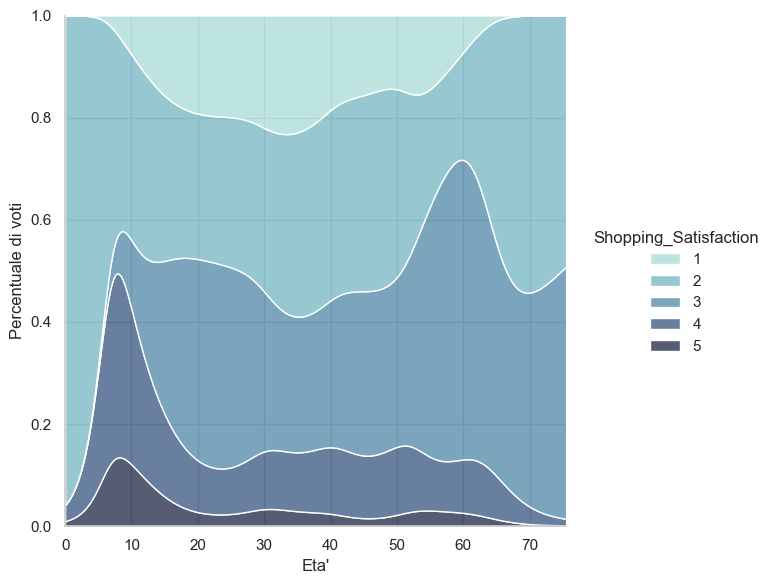

In [16]:
#indice di soddisfazione rigurado all'acquisto in base all'età

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.displot(data=dataset, x='age', hue='Shopping_Satisfaction', kind="kde", height=6 ,multiple="fill",
clip=(0, None),palette="ch:rot=-.25,hue=1,light=.80")
plt.xlabel("Eta'")
plt.ylabel('Percentuale di voti')
plt.show()